In [15]:
import kwant
import numpy as np
import matplotlib.pyplot as plt
import tinyarray
%matplotlib inline

In [16]:
def make_syst_topo(r=30, a=1, t=1, t2=0.5):
    syst = kwant.Builder()
    lat = kwant.lattice.honeycomb(a,norbs = 1, name = ['a','b'])
    
    def circle(pos):
        x,y = pos
        return x**2 + y**2 < r**2
    
    def rect(pos):
        x,y = pos
        return (0<= x<r and 0<=y<r)
        
    syst[lat.shape(circle,(0,0))] = 0
    syst[lat.neighbors()]=t
    
    syst[lat.a.neighbors()] = 1j*t2
    syst[lat.b.neighbors()] = -1j*t2
    syst.eradicate_dangling()
    return lat, syst.finalized()


In [17]:
lat,fsyst = make_syst_topo()

In [18]:
where = lambda s : np.linalg.norm(s.pos)<1
s_factory = kwant.kpm.LocalVectors(fsyst, where)
cond_xx = kwant.kpm.conductivity(fsyst, alpha = 'x',beta = 'x', mean = True,
                                num_vectors = None, vector_factory = s_factory)
s_factory = kwant.kpm.LocalVectors(fsyst, where)
cond_xy = kwant.kpm.conductivity(fsyst, alpha = 'x',beta = 'y', mean = True,
                                num_vectors = None, vector_factory = s_factory)
energies = cond_xx.energies
cond_array_xx = np.array([cond_xx(e,temperature = 0.01) for e in energies])
cond_array_xy = np.array([cond_xy(e,temperature = 0.01) for e in energies])

area_per_site = np.abs(np.cross(*lat.prim_vecs))/len(lat.sublattices)
cond_array_xx/=area_per_site
cond_array_xy/=area_per_site


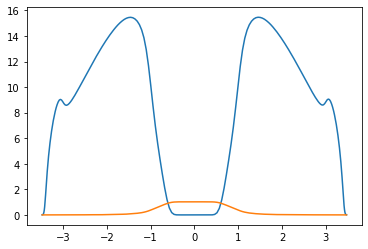

In [19]:
plt.plot(energies,cond_array_xx,energies,cond_array_xy)

In [ ]:
def make_syst_topo_band(r=30, a=1, t=1, t2=0.5):
    syst = kwant.Builder()
    lat = kwant.lattice.honeycomb(a,norbs = 1, name = ['a','b'])
    
    def circle(pos):
        x,y = pos
        return x**2 + y**2 < r**2
    
    syst[lat.shape(circle,(0,0))] = 0
    syst[lat.neighbors()]=t
    
    syst[lat.a.neighbors()] = 1j*t2
    syst[lat.b.neighbors()] = -1j*t2
    
    lead = kwant.Builder(kwant.TranslationalSymmetry([-a,0]))
    
    return lat, syst.finalized()